**Datacamp Project**

<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [24]:
#1. Calculating online purchase rates by customer type

#Subsetting for November and December
shop_nov_dec = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]
shop_nov_dec.head()

#Calculating frequency of sessions by customer type
count_session = shop_nov_dec.groupby(['CustomerType'])['Purchase'].value_counts()
count_session

#Number of sessions by customer type
total_new_customer = np.sum(count_session['New_Customer'])
total_returning_customer = np.sum(count_session['Returning_Customer'])

#Number of purchases by customer type
purchase_new_customer = count_session[('New_Customer', 1)]
purchase_returning_customer = count_session[('Returning_Customer', 1)]

#Calculating purchase rates number of purchases/number of sessions
purchase_rate_new = purchase_new_customer / total_new_customer
purchase_rate_returning = purchase_returning_customer / total_returning_customer

#Storing the result in a dictionary
purchase_rates = {"Returning_Customer": round(purchase_rate_returning, 3), "New_Customer": round(purchase_rate_new, 3)}
print(purchase_rates)

{'Returning_Customer': 0.196, 'New_Customer': 0.273}


In [25]:
#2. Identifying strongest correlation among duration variables

#Calculating correlation with Pandas
corr_admin_info = shop_nov_dec['Administrative_Duration'].corr(shop_nov_dec['Informational_Duration'])
corr_admin_product = shop_nov_dec['Administrative_Duration'].corr(shop_nov_dec['ProductRelated_Duration'])
corr_info_product = shop_nov_dec['Informational_Duration'].corr(shop_nov_dec['ProductRelated_Duration'])

print(corr_admin_info)
print(corr_admin_product)
print(corr_info_product)

# Another way to solve this is to use Scipy pearsonr function
# cor_admin_info = stats.pearsonr(shopping_Nov_Dec['Administrative_Duration'], shopping_Nov_Dec['Informational_Duration'])

# Another way to solve this is to use Pandas correlation matrix
# shopping_Nov_Dec[['Administrative_Duration','Informational_Duration','ProductRelated_Duration' ]].corr()

top_correlation = {"pair": ('Administrative_Duration', 'ProductRelated_Duration'), "correlation": round(corr_admin_product, 3)}
print(top_correlation)

0.24468855792839267
0.3898546003206963
0.36712552534442133
{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.39}


Current purchase rate for the returning customer: 0.196
Increased  purchase rate for returning customers is equal to: 0.225
Probability of having less than 100 sales: 0.0987778660962733
Probability of having at least 100 sales: 0.9012221339037267


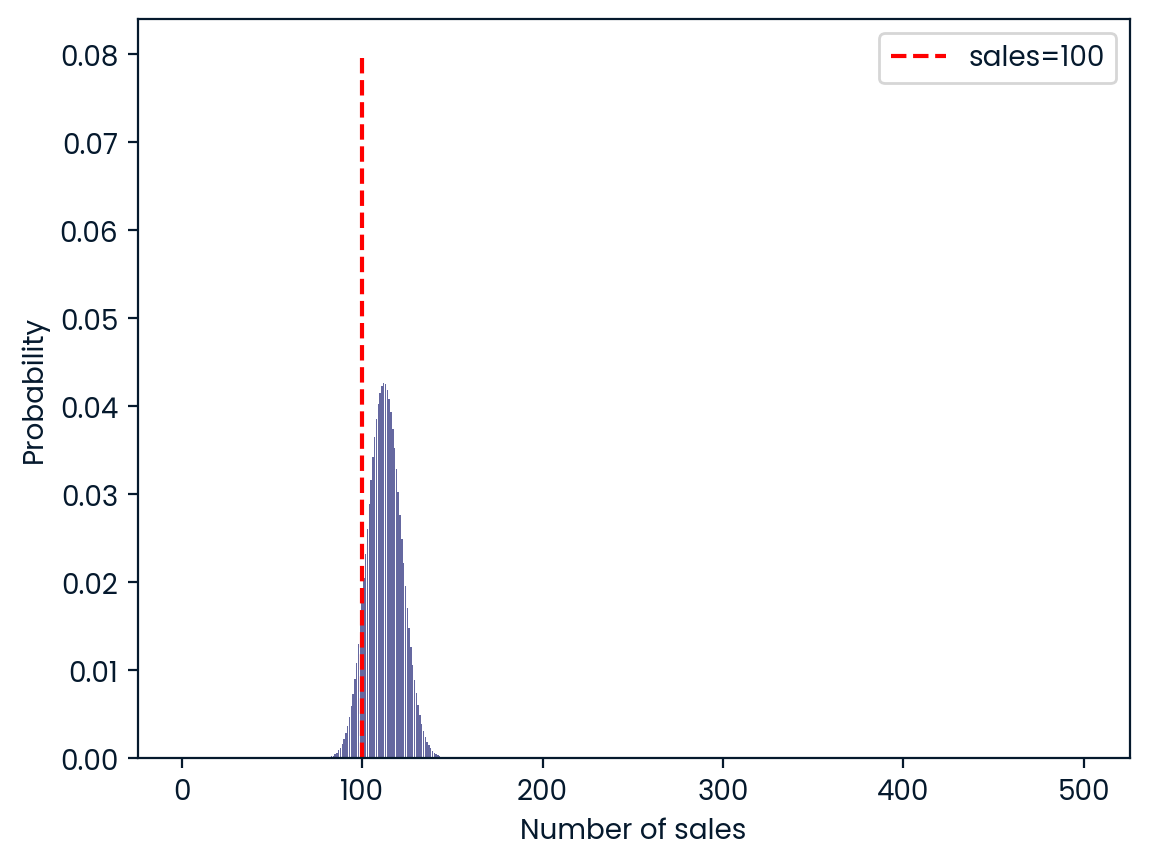

In [26]:
#3. 
## A new campaign for the returning customers will boost the purchase rate by 15%. 
## What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers?

# Purchase is a binomial random variable taking the value of either 0 or 1
# We know that the current purchase rate for the returning customers is
print("Current purchase rate for the returning customer:", round(purchase_rate_returning, 3))

#15% increase in this rate is equal to
increased_purchase_rate_returning = 1.15 * purchase_rate_returning
print("Increased  purchase rate for returning customers is equal to:", round(increased_purchased_rate_returning, 3))

#Finding likelihood of having less than 100 sales of 500 sessions
#Using binomial cdf
prob_sales_100_less = stats.binom.cdf(k=100, n=500, p=increased_purchased_rate_returning)
print("Probability of having less than 100 sales:", prob_sales_100_less)

#Finding probability of having 100 or more sales out of 500 sessions 1-prob_sales_100_less
prob_at_least_100_sales = 1 - prob_sales_100_less
print("Probability of having at least 100 sales:", prob_at_least_100_sales)

#Optional - Plotting binomial probability distribution
n_sessions = 500
k_values = np.arange(500) + 1
p_binom_values = [stats.binom.pmf(k, n_sessions, increased_purchase_rate_returning) for k in k_values]
plt.bar(k_values, p_binom_values)
plt.vlines(100, 0, 0.08, color='r', linestyles='dashed', label="sales=100")
plt.xlabel("Number of sales")
plt.ylabel("Probability")
plt.legend()
plt.show()